# Safari Challenge

In this challenge, you must use what you've learned to train a convolutional neural network model that classifies images of animals you might find on a safari adventure.

## Explore the data

The training images you must use are in the **/safari/training** folder. Run the cell below to see an example of each image class, and note the shape of the images (which indicates the dimensions of the image and its color channels).

# Dylan McMaster
# Student Number: 578674

# Kyle McAdam
# Student Number: 578403

4 classes:
['elephant', 'giraffe', 'lion', 'zebra']


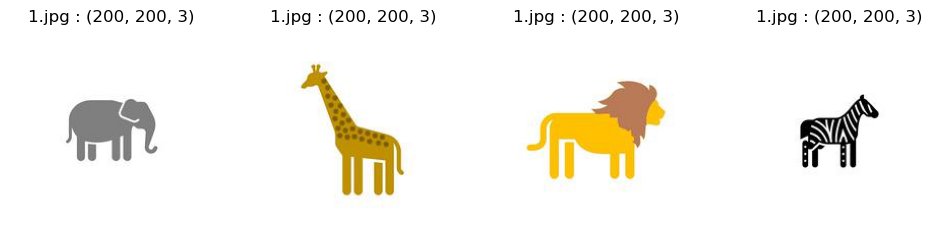

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# The images are in the data/shapes folder
# You need to change the data_path to match the location of your images
data_path = "./safari/training"
# Get the class names
classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(12, 12))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    img_shape = np.array(img).shape
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file + ' : ' + str(img_shape))
plt.show()

Now that you've seen the images, use your preferred framework (PyTorch or TensorFlow) to train a CNN classifier for them. Your goal is to train a classifier with a validation accuracy of 95% or higher.

Add cells as needed to create your solution.

### Install and import TensorFlow

In [2]:
#Your libraries here
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Is used to preprocess, and split images

## Preprocessing images with ImageDataGenerator

ImageDataGenerator is widely used and a convenient tool in Tensorflow. This tool is going to be used in this project as it allows for "On-the-fly Generation" which basically means that it applies transformations to the input images in real time during model training allowing you to safe memory and isk space. Secondly ImageDataGenerator is specifically designed to work with tensorflow.

In [3]:
# Here we already define the split which will be 70:30 as well as how we are scaling each pixel between 0 and 1
data_generator = ImageDataGenerator(rescale = 1.0/255, validation_split = 0.3)
print('Instances belonging to the train set')
training_generator = data_generator.flow_from_directory(
    data_path,
    target_size = (200, 200),
    batch_size = 20,
    class_mode='categorical', # Categorical shows that one-hot encoding is being applied to the label
    subset='training' # Specifies that this generator will be for the training data
)
print('Instances belonging to the validation set')
validation_generator = data_generator.flow_from_directory(
    data_path,
    target_size = (200, 200),
    batch_size = 20,
    class_mode='categorical', # Categorical shows that one-hot encoding is being applied to the label
    subset='validation' # Specifies that this generator will be for the testing data set
)
print("Data generation completed!")
classnames = list(training_generator.class_indices.keys())

Instances belonging to the train set
Found 280 images belonging to 4 classes.
Instances belonging to the validation set
Found 116 images belonging to 4 classes.
Data generation completed!


### Define CNN
Below are some suggested steps to follow or you can use your own steps to define your CNN.

In [4]:
#Define a CNN classifier network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the model as a sequence of layers
safari_model = Sequential()
# The input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
safari_model.add(Conv2D(32, (6,6), input_shape = training_generator.image_shape, activation = 'relu'))
# Next we'll add a max pooling layer with a 2x2 patch
safari_model.add(MaxPooling2D(pool_size=(2,2)))
# We can add as many layers as we think necessary - here we'll add another convolution and max pooling layer
safari_model.add(Conv2D(32, (6,6), activation = 'relu'))
safari_model.add(MaxPooling2D(pool_size=(2,2)))
# And another set
safari_model.add(Conv2D(64, (6,6), activation = 'relu'))
safari_model.add(MaxPooling2D(pool_size=(2,2)))
# A dropout layer randomly drops some nodes to reduce inter-dependencies (which can cause over-fitting)
safari_model.add(Dropout(0.25))
# Now we'll flatten the feature maps and generate an output layer with a predicted probability for each class
safari_model.add(Flatten())
safari_model.add(Dense(training_generator.num_classes, activation='softmax'))
# With the layers defined, we can now compile the model for categorical (multi-class) classification
safari_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#print model summary
print(safari_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 195, 195, 32)      3488      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 64)       0

### Train the model
Train a CNN model with 10 epochs.

In [5]:
# Your Code to train a CNN model...
num_epochs = 10
trained_model = safari_model.fit(
    training_generator,
    steps_per_epoch = len(training_generator),
    validation_data = validation_generator, 
    validation_steps = len(validation_generator),
    epochs = num_epochs)


Epoch 1/10
14/14 [==============================] - 7s 473ms/step - loss: 1.2380 - accuracy: 0.5214 - val_loss: 0.3972 - val_accuracy: 1.0000
Epoch 2/10
14/14 [==============================] - 6s 463ms/step - loss: 0.1385 - accuracy: 0.9821 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 3/10
14/14 [==============================] - 7s 468ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 7.0966e-04 - val_accuracy: 1.0000
Epoch 4/10
14/14 [==============================] - 7s 491ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.8691e-04 - val_accuracy: 1.0000
Epoch 5/10
14/14 [==============================] - 7s 479ms/step - loss: 3.0795e-04 - accuracy: 1.0000 - val_loss: 1.9908e-04 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 7s 469ms/step - loss: 1.2643e-04 - accuracy: 1.0000 - val_loss: 7.6475e-05 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 7s 470ms/step - loss: 7.9974e-05 - accuracy: 1.0000 - val_loss: 5.5802e-

### View loss history
- To check for overfitting.

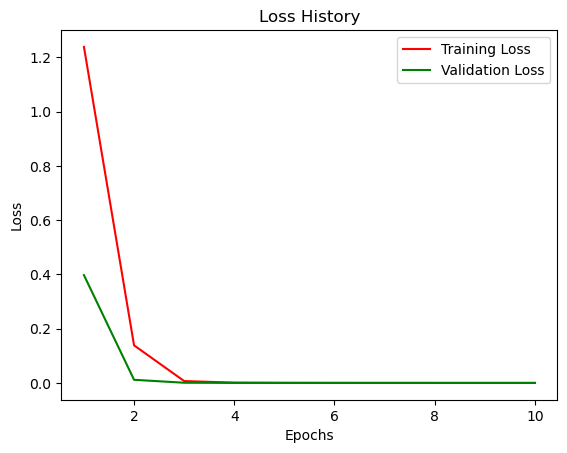

In [6]:
# your code here
# Access the loss history from the history object
training_loss = trained_model.history['loss'] #List of loss values for training set
validation_loss = trained_model.history['val_loss'] #List of loss values for validation set

epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'r', label='Training Loss')
plt.plot(epochs, validation_loss, 'g', label='Validation Loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Evaluate the model

1/1 [==============================] - 0s 125ms/step


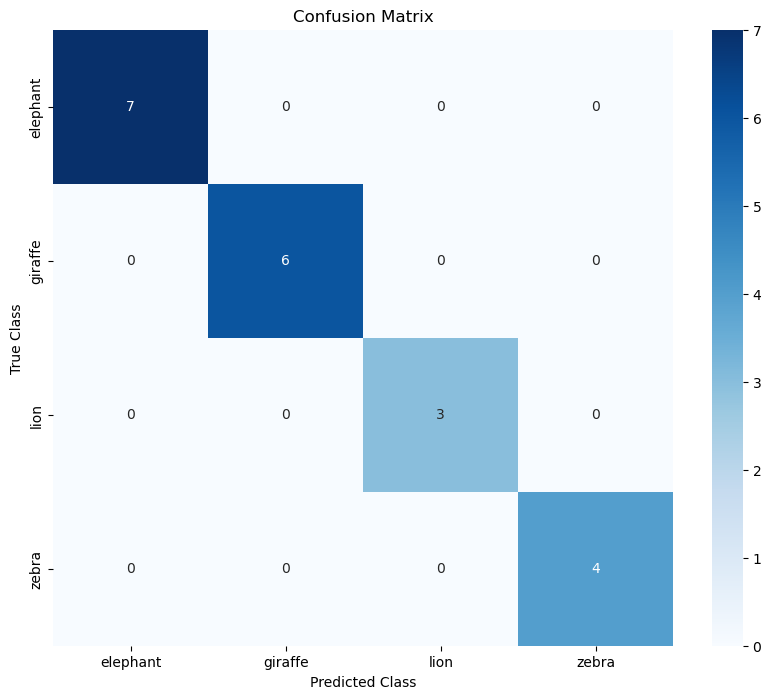

In [7]:
# Get the image and label arrays for the first batch of validation data
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_validation = validation_generator[0][0]
y_validation = validation_generator[0][1]
# Use the model to predict the class
predict_probabilities = safari_model.predict(X_validation)
# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predicted_classes = np.argmax(predict_probabilities, axis=1) # Retruns the max value for each row from the total classes.
# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
actual_labels = np.argmax(y_validation, axis = 1)

# Calculate the confusion matrix
cm = confusion_matrix(actual_labels, predicted_classes)

# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classnames, yticklabels=classnames)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()


### Save your model

Add code below to save your model's trained weights.

In [8]:
# Code to save your model
modelFileName = 'Safari_Animals.h5'
safari_model.save(modelFileName)
del safari_model  # Free up space by releasing the memory occupied by the model to avoid conflics later on when we reassign the model
print('model saved as', modelFileName)

model saved as Safari_Animals.h5


### Use the trained model

Now that we've trained your model, modify the following code as necessary to use it to predict the classes of the provided test images.

1/1 [==============================] - 0s 16ms/step


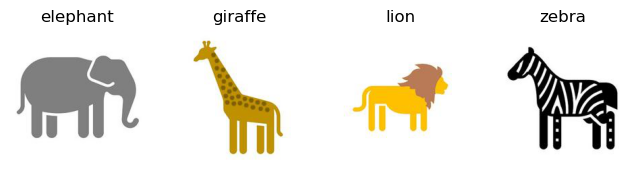

In [9]:
# Your code here
from tensorflow.keras import models
import numpy as np
import os

# Function to predict the class of an image
def predict_image(model, image):
    from tensorflow import convert_to_tensor
    # The model expects a batch of images as input, so we'll create an array of 1 image
    imgfeatures = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])

    #Normalise the feature between 0 and 1 as the model expects it to be in this format
    img_dimensions = imgfeatures.astype('float32')
    img_dimensions /= 255
    
    # Use the model to predict the image class
    class_probabilities = model.predict(imgfeatures)
    
    # Get the class with the highest probability
    index = int(np.argmax(class_probabilities, axis=1)[0])
    return index


# Load your model
model = models.load_model(modelFileName) # loads the saved model

# The images are in the data/shapes folder
test_data_path = './safari/test'

# Show the test images with predictions
fig = plt.figure(figsize=(8, 12))
i = 0
for img_file in os.listdir(test_data_path):
    i+=1
    img_path = os.path.join(test_data_path, img_file)
    img = mpimg.imread(img_path)
    # Get the image class prediction
    index = predict_image(model, np.array(img))
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(classes[index])
plt.show()

Hopefully, your model predicted all four of the image classes correctly!

As you can see we predicted all the images in the test file correctly

# Now we are making the model more dynamic

FileUpload(value={'lion.jpg': {'metadata': {'name': 'lion.jpg', 'type': 'image/jpeg', 'size': 3172, 'lastModif…

Button(description='Predict', style=ButtonStyle())

1/1 [==============================] - 0s 45ms/step


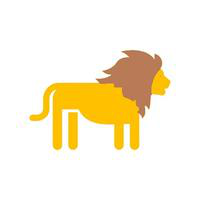

Predicted animal: lion


In [10]:
from IPython.display import display, clear_output
import ipywidgets as widgets
from IPython.display import Image as image_display
import pathlib
import io
from PIL import Image

uploaded_files = {}
upload_button = widgets.FileUpload()

def display_image(image_path):
    image = Image.open(image_path)
    display(image)
    
    
def handle_upload_button(change):
    for filename, file_info in upload_button.value.items():
        # current working directory        
        uploaded_files[filename] = file_info['content']
        print(f"File '{filename}' uploaded.")       
        
        
upload_button.observe(handle_upload_button, names='value')

def predict_image(sender):
    clear_output()  # Clear previous output
    display(upload_button)
    display(predict_button)
    
    if uploaded_files:
        filename = list(uploaded_files.keys())[-1]
        image_data = uploaded_files[filename]
        
        # Convert image_data to numpy array
        image = Image.open(io.BytesIO(image_data))
        image_array = np.array(image)
        
        # Resize the image array to (200, 200, 3)
        resized_image = tf.image.resize(image_array, [200, 200])
        
        # Expand dimensions to match the model input shape (None, 200, 200, 3)
        input_image = np.expand_dims(resized_image, axis=0)
    
        # Perform the prediction on the input_image
        prediction = model.predict(input_image)
        class_index = np.argmax(prediction)
        class_label = classnames[class_index] 
        display_image('./safari/test/'+class_label+'.jpg')
        # Display the prediction result
        print("Predicted animal:", class_label)
        
    else:
        print("No image uploaded.")
        
predict_button = widgets.Button(description='Predict')
predict_button.on_click(predict_image)

display(upload_button)
display(predict_button)